In [1]:
import pandas as pd
filePath='BTC-USD.csv'
fP= pd.read_csv(filePath, delimiter=',')
display(fP)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3530,2024-05-17,65231.296875,67459.460938,65119.316406,67051.875000,67051.875000,28031279310
3531,2024-05-18,67066.210938,67387.328125,66663.500000,66940.804688,66940.804688,16712277406
3532,2024-05-19,66937.929688,67694.296875,65937.179688,66278.367188,66278.367188,19249094538
3533,2024-05-20,66278.742188,71483.562500,66086.171875,71448.195313,71448.195313,43850655717


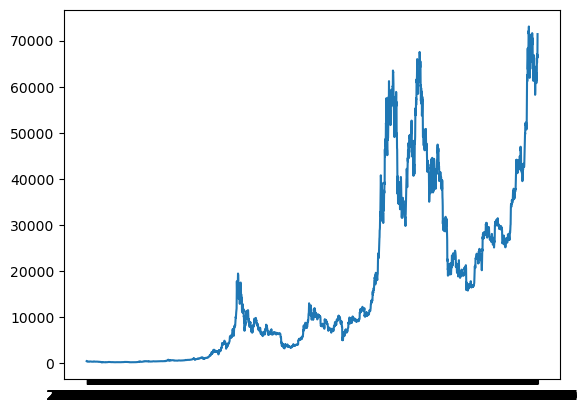

In [2]:
import matplotlib.pyplot as plt
import numpy as np
dateColumList=[]
openColumList=[]
for i in range(1,3535):
    dateColum= fP.loc[i,'Date']
    dateColumList.append(dateColum)
for j in range(1,3535):
    openColum= fP.loc[j,'Open']
    openColumList.append(openColum)
highColumList =fP['High'].tolist()
lowColumList =fP['Low'].tolist()
plt.plot(dateColumList,openColumList)
plt.show()





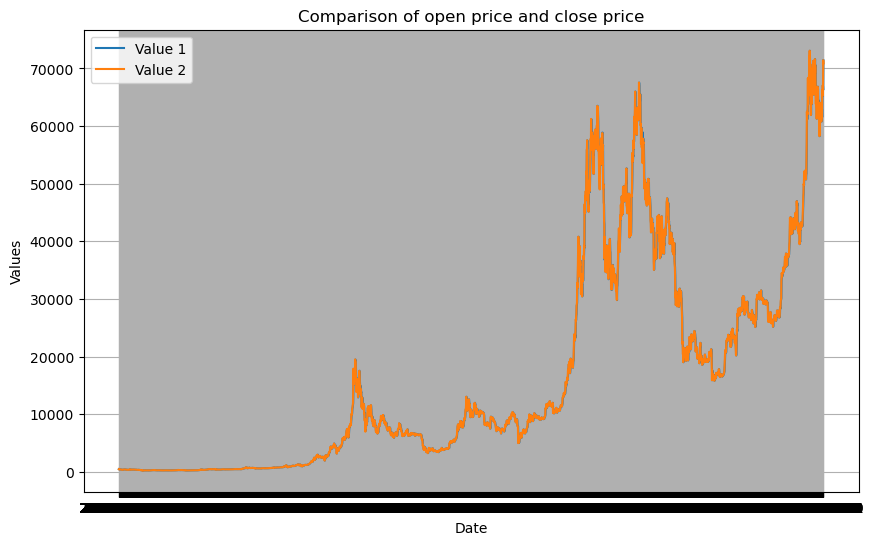

In [3]:
closeColumList=[]
for i in range(1,3535):
    closeColum= fP.loc[i,'Close']
    closeColumList.append(closeColum)
plt.figure(figsize=(10, 6))
plt.plot(dateColumList, openColumList, label='Value 1')
plt.plot(dateColumList, closeColumList, label='Value 2')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Comparison of open price and close price')
plt.legend()
plt.grid(True)
plt.show()

    

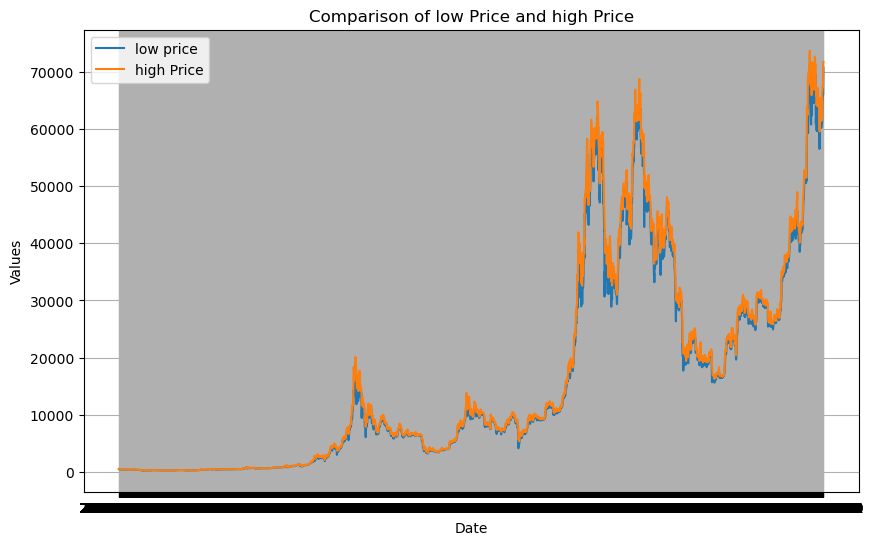

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# فرض کنید که داده‌هایتان در دیتافریمی به نام fP قرار دارند
# و ستون‌های 'Date', 'Open' و 'Close' موجود باشند

# تعریف و مقداردهی لیست‌ها
dateColumList = fP['Date'].tolist()
openColumList = fP['Open'].tolist()
closeColumList = fP['Close'].tolist()

# رسم نمودار خطی برای مقایسه 'Open' و 'Close'
plt.figure(figsize=(10, 6))
plt.plot(dateColumList, lowColumList, label='low price')
plt.plot(dateColumList, highColumList, label='high Price')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Comparison of low Price and high Price')
plt.legend()
plt.grid(True)
plt.show()


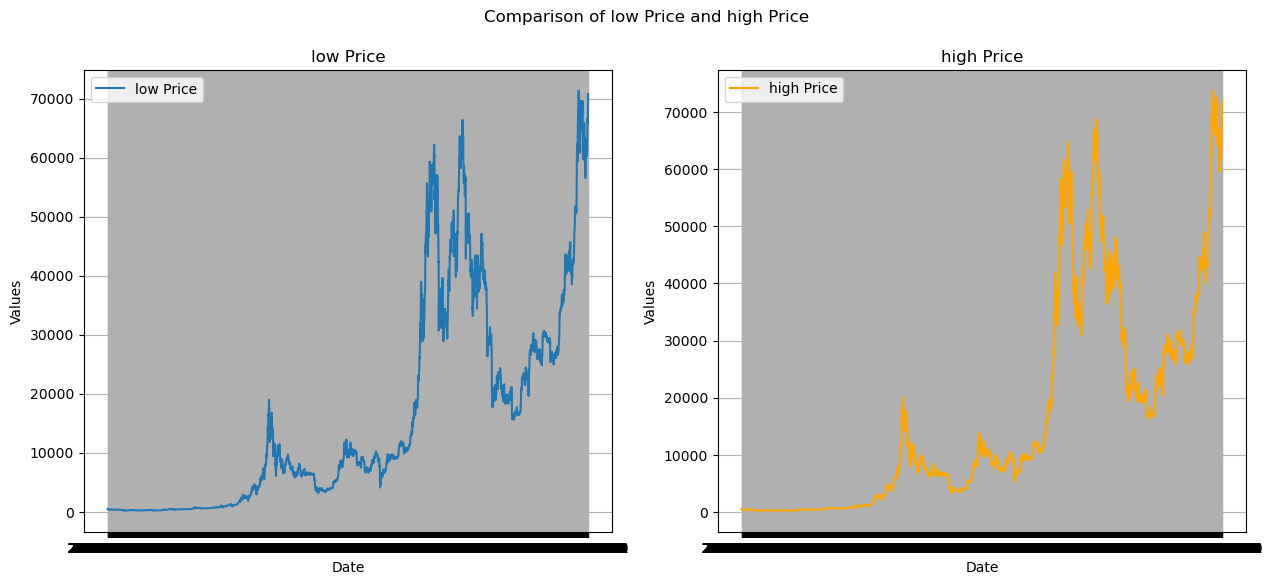

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
# رسم نمودار خطی برای open price در اولین subplot
ax1.plot(dateColumList, lowColumList, label='low Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Values')
ax1.set_title('low Price')
ax1.legend()
ax1.grid(True)

# رسم نمودار خطی برای close price در دومین subplot
ax2.plot(dateColumList, highColumList, label='high Price', color='orange')
ax2.set_xlabel('Date')
ax2.set_ylabel('Values')
ax2.set_title('high Price')
ax2.legend()
ax2.grid(True)

# تنظیم عنوان کلی نمودارها
fig.suptitle('Comparison of low Price and high Price')

plt.show()


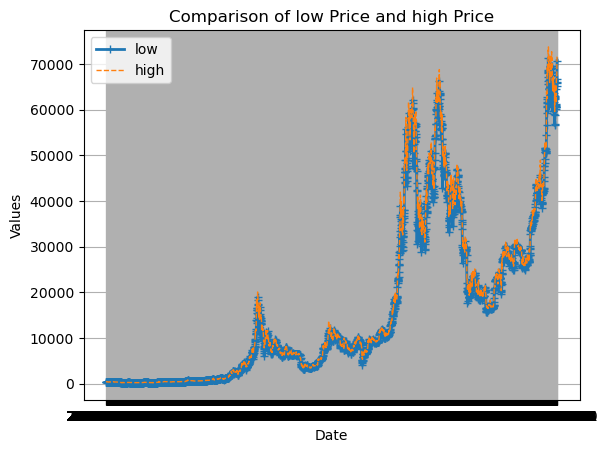

In [7]:
plt.plot(dateColumList, lowColumList, ls='-',lw=2,marker="+",mew=1)
plt.plot(dateColumList, highColumList, ls="--",lw=1)
plt.title('Comparison of low Price and high Price')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend(['low','high'], loc='best')
plt.grid()
plt.show()

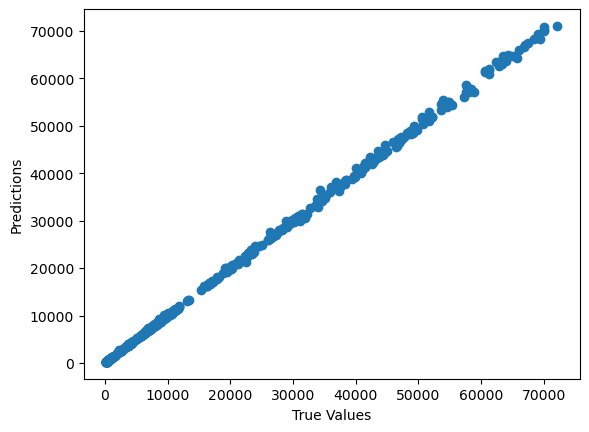

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
X = fP[['Open', 'High', 'Low', 'Volume']].values
y = fP['Close'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()


# اندیکاتورها

 ## اندیکاتور sma

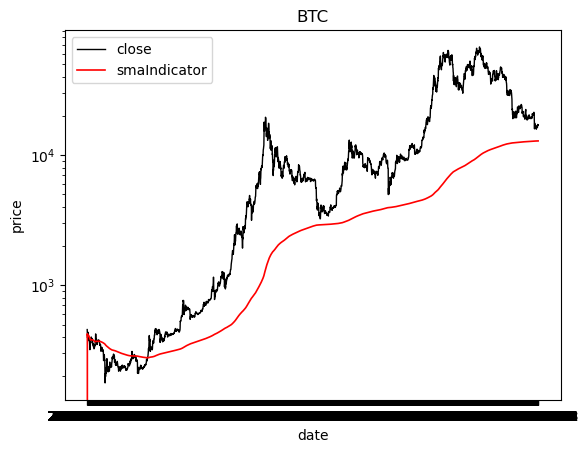

In [9]:
sma=[0]
l1=len(dateColumList)
l=len(closeColumList)
z=0
for i in range(1,3000):
    z+=closeColumList[i]
    f=z/i
    sma.append(f)
subList=closeColumList[:3000]
plt.semilogy(dateColumList[:3000], subList, label='close',c='k', linewidth=1)
plt.semilogy(dateColumList[0:3000], sma, label='smaIndicator',c='r', linewidth=1.2)
plt.xlabel('date')
plt.ylabel('price')
plt.title('BTC')
plt.legend()
plt.show()
           

    
    


## اندیکاتور EMA

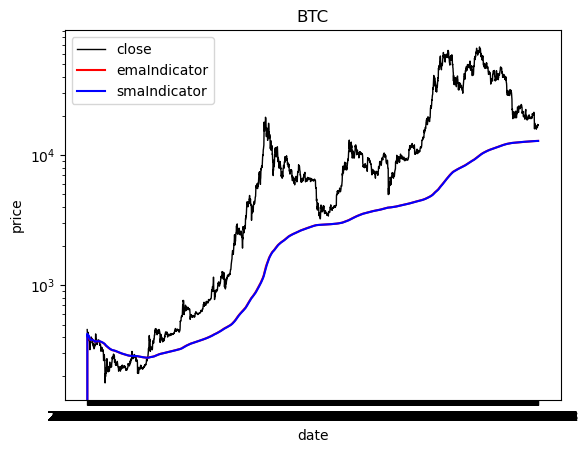

In [10]:
emaList=[0]
l=3000
for i in range(1,l):
    a=i+1
    b=2/a
    emaPervius=sma[i]*(1-b)
    price=closeColumList[i+1]*b
    emaFinal=price+emaPervius
    emaList.append(emaFinal)
subList=closeColumList[:3000]
plt.semilogy(dateColumList[:3000], subList, label='close',c='k', linewidth=1)
plt.semilogy(dateColumList[:3000], emaList, label='emaIndicator',c='r', linewidth=1.5)
plt.semilogy(dateColumList[:3000], sma, label='smaIndicator',c='b', linewidth=1.5)
plt.xlabel('date')
plt.ylabel('price')
plt.title('BTC')
plt.legend()
plt.show()


# پیش بینی قیمت 

Predicted prices for the last 10 days: [61102.90078946 62525.64499576 61455.29550677 64671.02616148
 64795.08343    65944.77683277 66343.46171372 66256.62754726
 67290.32071711 67667.5505238 ]
Actual prices for the last 10 days: [61448.394531 62901.449219 61552.789063 66267.492188 65231.582031
 67051.875    66940.804688 66278.367188 71448.195313 70888.25    ]
MAPE (Mean Absolute Percentage Error): 1.73%


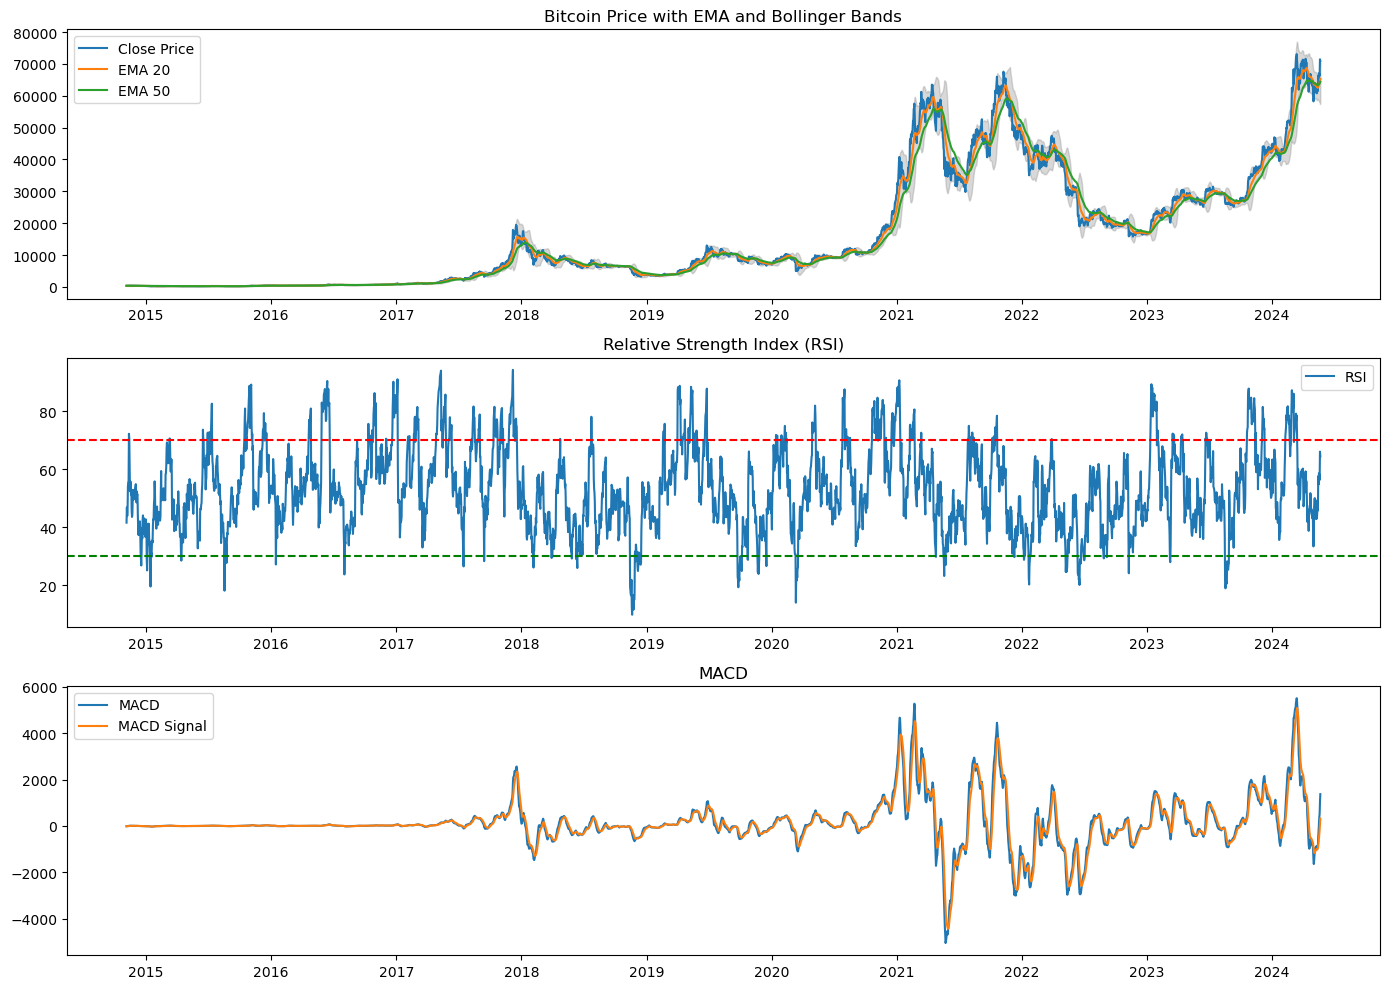

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ta
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error

# ایجاد DataFrame از داده‌های لیست
dates = pd.date_range(start='2014-09-17', periods=len(closeColumList), freq='D')
df = pd.DataFrame({'Close': closeColumList}, index=dates)

# محاسبه اندیکاتورهای پیشرفته
df['EMA_20'] = ta.trend.ema_indicator(df['Close'], window=20)
df['EMA_50'] = ta.trend.ema_indicator(df['Close'], window=50)
df['RSI'] = ta.momentum.rsi(df['Close'], window=14)
bb_indicator = ta.volatility.BollingerBands(df['Close'], window=20, window_dev=2)
df['BB_High'] = bb_indicator.bollinger_hband()
df['BB_Low'] = bb_indicator.bollinger_lband()
macd_indicator = ta.trend.MACD(df['Close'])
df['MACD'] = macd_indicator.macd()
df['MACD_Signal'] = macd_indicator.macd_signal()

# حذف سطرهایی که حاوی NaN هستند
df.dropna(inplace=True)

# آماده‌سازی داده‌ها برای مدل SVR
X = df[['EMA_20', 'EMA_50', 'RSI', 'BB_High', 'BB_Low', 'MACD', 'MACD_Signal']]
y = df['Close']

# استانداردسازی داده‌ها
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# تقسیم داده‌ها به دو قسمت: داده‌های آموزشی و داده‌های تست
train_size = len(df) - 10
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y_scaled[:train_size], y_scaled[train_size:]

# ایجاد و آموزش مدل SVR
model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
model.fit(X_train, y_train)

# پیش‌بینی قیمت‌های 10 روز آخر
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

# محاسبه درصد خطا (MAPE)
mape = mean_absolute_percentage_error(y_test_original, y_pred) * 100

# نمایش پیش‌بینی و درصد خطا
print(f'Predicted prices for the last 10 days: {y_pred}')
print(f'Actual prices for the last 10 days: {y_test_original}')
print(f'MAPE (Mean Absolute Percentage Error): {mape:.2f}%')

# رسم نمودار قیمت بیت‌کوین به همراه اندیکاتورها
plt.figure(figsize=(14, 10))

plt.subplot(3, 1, 1)
plt.plot(df.index, df['Close'], label='Close Price')
plt.plot(df.index, df['EMA_20'], label='EMA 20')
plt.plot(df.index, df['EMA_50'], label='EMA 50')
plt.fill_between(df.index, df['BB_High'], df['BB_Low'], color='gray', alpha=0.3)
plt.title('Bitcoin Price with EMA and Bollinger Bands')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(df.index, df['RSI'], label='RSI')
plt.axhline(70, color='r', linestyle='--')
plt.axhline(30, color='g', linestyle='--')
plt.title('Relative Strength Index (RSI)')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(df.index, df['MACD'], label='MACD')
plt.plot(df.index, df['MACD_Signal'], label='MACD Signal')
plt.title('MACD')
plt.legend()

plt.tight_layout()
plt.show()


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but 

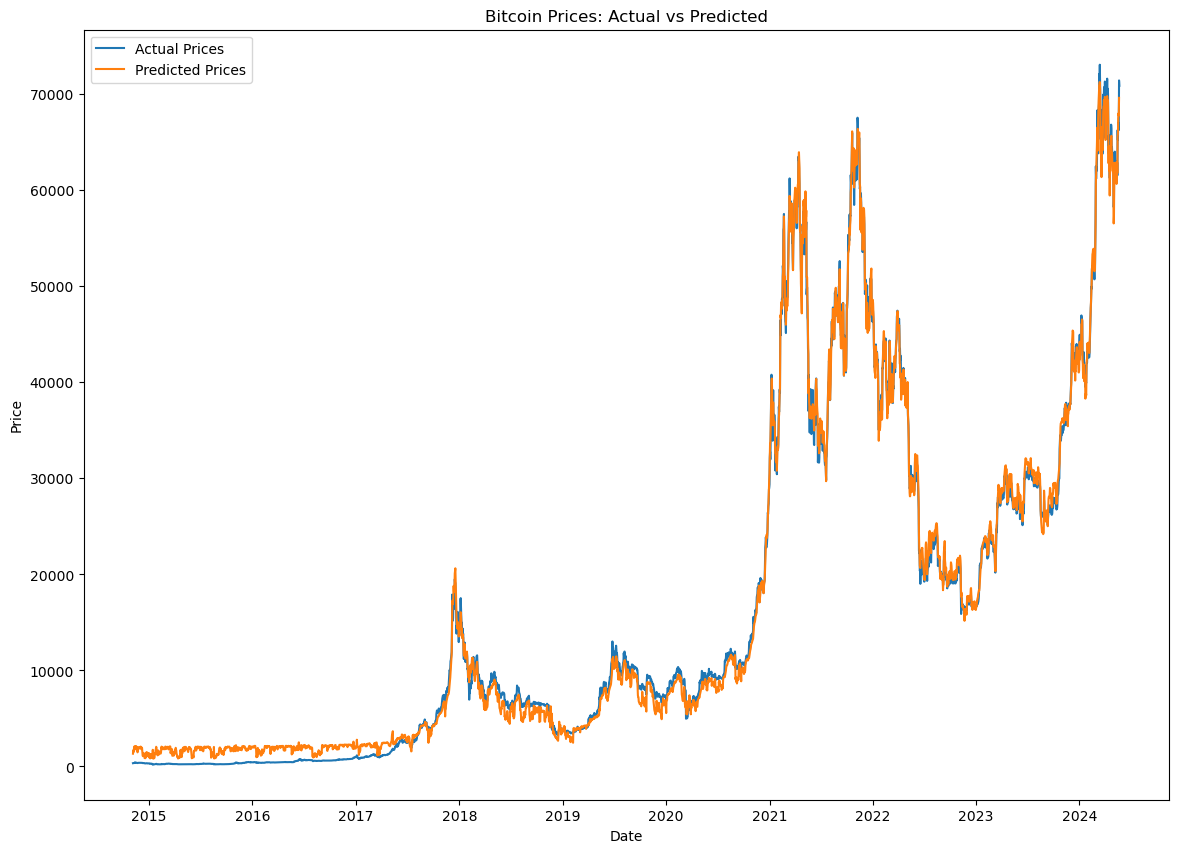

Initial Investment: 10000
Final Cash: 376713.78
Profit: 366713.78
MAPE (Mean Absolute Percentage Error): 95.38%


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ta
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error


# ایجاد DataFrame از داده‌های لیست
dates = pd.date_range(start='2014-09-17', periods=len(closeColumList), freq='D')
df = pd.DataFrame({'Close': closeColumList}, index=dates)

# محاسبه اندیکاتورهای پیشرفته
df['EMA_20'] = ta.trend.ema_indicator(df['Close'], window=20)
df['EMA_50'] = ta.trend.ema_indicator(df['Close'], window=50)
df['RSI'] = ta.momentum.rsi(df['Close'], window=14)
bb_indicator = ta.volatility.BollingerBands(df['Close'], window=20, window_dev=2)
df['BB_High'] = bb_indicator.bollinger_hband()
df['BB_Low'] = bb_indicator.bollinger_lband()
macd_indicator = ta.trend.MACD(df['Close'])
df['MACD'] = macd_indicator.macd()
df['MACD_Signal'] = macd_indicator.macd_signal()

# حذف سطرهایی که حاوی NaN هستند
df.dropna(inplace=True)

# آماده‌سازی داده‌ها برای مدل SVR
X = df[['EMA_20', 'EMA_50', 'RSI', 'BB_High', 'BB_Low', 'MACD', 'MACD_Signal']]
y = df['Close']

# استانداردسازی داده‌ها
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# ایجاد و آموزش مدل SVR
model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
model.fit(X_scaled, y_scaled)

# شبیه‌سازی خرید و فروش
initial_investment = 10000  # مقدار اولیه پول (مثلاً 10,000 دلار)
cash = initial_investment
bitcoin = 0
predicted_prices = []

# پیش‌بینی قیمت‌های روزانه و انجام معاملات براساس پیش‌بینی‌ها
for i in range(len(df)):
    current_price = df['Close'].iloc[i]
    
    if i < len(df) - 1:
        next_X = np.array([df['EMA_20'].iloc[i], df['EMA_50'].iloc[i], df['RSI'].iloc[i], df['BB_High'].iloc[i], df['BB_Low'].iloc[i], df['MACD'].iloc[i], df['MACD_Signal'].iloc[i]]).reshape(1, -1)
        next_X_scaled = scaler_X.transform(next_X)
        next_y_scaled = model.predict(next_X_scaled)
        next_price = scaler_y.inverse_transform(next_y_scaled.reshape(-1, 1)).flatten()[0]
        predicted_prices.append(next_price)
        
        if next_price > current_price:  # سیگنال خرید
            if cash > 0:
                bitcoin += cash / current_price
                cash = 0
        elif next_price < current_price:  # سیگنال فروش
            if bitcoin > 0:
                cash += bitcoin * current_price
                bitcoin = 0

# محاسبه سود نهایی
final_cash = cash + bitcoin * df['Close'].iloc[-1]
profit = final_cash - initial_investment

# رسم نمودار قیمت بیت‌کوین به همراه پیش‌بینی‌ها
plt.figure(figsize=(14, 10))

plt.plot(df.index, df['Close'], label='Actual Prices')
plt.plot(df.index[:len(predicted_prices)], predicted_prices, label='Predicted Prices')
plt.title('Bitcoin Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# محاسبه درصد اختلاف
actual_prices = df['Close'].values[-len(predicted_prices):]
mape = mean_absolute_percentage_error(actual_prices, predicted_prices) * 100

# نمایش نتایج
print(f'Initial Investment: {initial_investment}')
print(f'Final Cash: {final_cash:.2f}')
print(f'Profit: {profit:.2f}')
print(f'MAPE (Mean Absolute Percentage Error): {mape:.2f}%')


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ta
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error

# ایجاد DataFrame از داده‌های لیست
dates = pd.date_range(start='2014-09-17', periods=len(closeColumList), freq='D')
df = pd.DataFrame({'Close': closeColumList}, index=dates)

# استفاده از داده‌ها تا 365 روز قبل از پایان لیست
df_train = df[:-365]
df_test = df[-365:]

# محاسبه اندیکاتورهای پیشرفته برای داده‌های آموزشی
df_train['EMA_20'] = ta.trend.ema_indicator(df_train['Close'], window=20)
df_train['EMA_50'] = ta.trend.ema_indicator(df_train['Close'], window=50)
df_train['RSI'] = ta.momentum.rsi(df_train['Close'], window=14)
bb_indicator_train = ta.volatility.BollingerBands(df_train['Close'], window=20, window_dev=2)
df_train['BB_High'] = bb_indicator_train.bollinger_hband()
df_train['BB_Low'] = bb_indicator_train.bollinger_lband()
macd_indicator_train = ta.trend.MACD(df_train['Close'])
df_train['MACD'] = macd_indicator_train.macd()
df_train['MACD_Signal'] = macd_indicator_train.macd_signal()

# حذف سطرهایی که حاوی NaN هستند
df_train.dropna(inplace=True)

# آماده‌سازی داده‌ها برای مدل SVR
X_train = df_train[['EMA_20', 'EMA_50', 'RSI', 'BB_High', 'BB_Low', 'MACD', 'MACD_Signal']]
y_train = df_train['Close']

# استانداردسازی داده‌ها
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()

# ایجاد و آموزش مدل SVR
model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
model.fit(X_train_scaled, y_train_scaled)

# محاسبه اندیکاتورهای پیشرفته برای داده‌های تست
df_test['EMA_20'] = ta.trend.ema_indicator(df_test['Close'], window=20)
df_test['EMA_50'] = ta.trend.ema_indicator(df_test['Close'], window=50)
df_test['RSI'] = ta.momentum.rsi(df_test['Close'], window=14)
bb_indicator_test = ta.volatility.BollingerBands(df_test['Close'], window=20, window_dev=2)
df_test['BB_High'] = bb_indicator_test.bollinger_hband()
df_test['BB_Low'] = bb_indicator_test.bollinger_lband()
macd_indicator_test = ta.trend.MACD(df_test['Close'])
df_test['MACD'] = macd_indicator_test.macd()
df_test['MACD_Signal'] = macd_indicator_test.macd_signal()

# حذف سطرهایی که حاوی NaN هستند
df_test.dropna(inplace=True)

# شبیه‌سازی خرید و فروش برای 365 روز آخر
initial_investment = 10000  # مقدار اولیه پول (مثلاً 10,000 دلار)
cash = initial_investment
bitcoin = 0
predicted_prices = []

for i in range(len(df_train), len(df)):
    current_price = df['Close'].iloc[i]
    
    if i < len(df) - 1:
        next_X = np.array([df['EMA_20'].iloc[i], df['EMA_50'].iloc[i], df['RSI'].iloc[i], df['BB_High'].iloc[i], df['BB_Low'].iloc[i], df['MACD'].iloc[i], df['MACD_Signal'].iloc[i]]).reshape(1, -1)
        next_X_scaled = scaler_X.transform(next_X)
        next_y_scaled = model.predict(next_X_scaled)
        next_price = scaler_y.inverse_transform(next_y_scaled.reshape(-1, 1)).flatten()[0]
        predicted_prices.append(next_price)
        
        if next_price > current_price:  # سیگنال خرید
            if cash > 0:
                bitcoin += cash / current_price
                cash = 0
        elif next_price < current_price:  # سیگنال فروش
            if bitcoin > 0:
                cash += bitcoin * current_price
                bitcoin = 0

# محاسبه سود نهایی
final_cash = cash + bitcoin * df['Close'].iloc[-1]
profit = final_cash - initial_investment

# رسم نمودار قیمت بیت‌کوین به همراه پیش‌بینی‌ها
plt.figure(figsize=(14, 10))

plt.plot(df.index, df['Close'], label='Actual Prices')
plt.plot(df.index[-365:], predicted_prices, label='Predicted Prices')
plt.title('Bitcoin Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# محاسبه درصد اختلاف
actual_prices = df['Close'].values[-365:]
mape = mean_absolute_percentage_error(actual_prices, predicted_prices) * 100

# نمایش نتایج
print(f'Initial Investment: {initial_investment}')
print(f'Final Cash: {final_cash:.2f}')
print(f'Profit: {profit:.2f}')
print(f'MAPE (Mean Absolute Percentage Error): {mape:.2f}%')


C:\Users\HP\AppData\Local\Temp\ipykernel_6332\950315005.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['EMA_20'] = ta.trend.ema_indicator(df_train['Close'], window=20)
C:\Users\HP\AppData\Local\Temp\ipykernel_6332\950315005.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['EMA_50'] = ta.trend.ema_indicator(df_train['Close'], window=50)
C:\Users\HP\AppData\Local\Temp\ipykernel_6332\950315005.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

KeyError: 'EMA_20'

C:\Users\HP\AppData\Local\Temp\ipykernel_6332\2073875617.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['EMA_20'] = ta.trend.ema_indicator(df_train['Close'], window=20)
C:\Users\HP\AppData\Local\Temp\ipykernel_6332\2073875617.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['EMA_50'] = ta.trend.ema_indicator(df_train['Close'], window=50)
C:\Users\HP\AppData\Local\Temp\ipykernel_6332\2073875617.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

ValueError: x and y must have same first dimension, but have shapes (365,) and (364,)

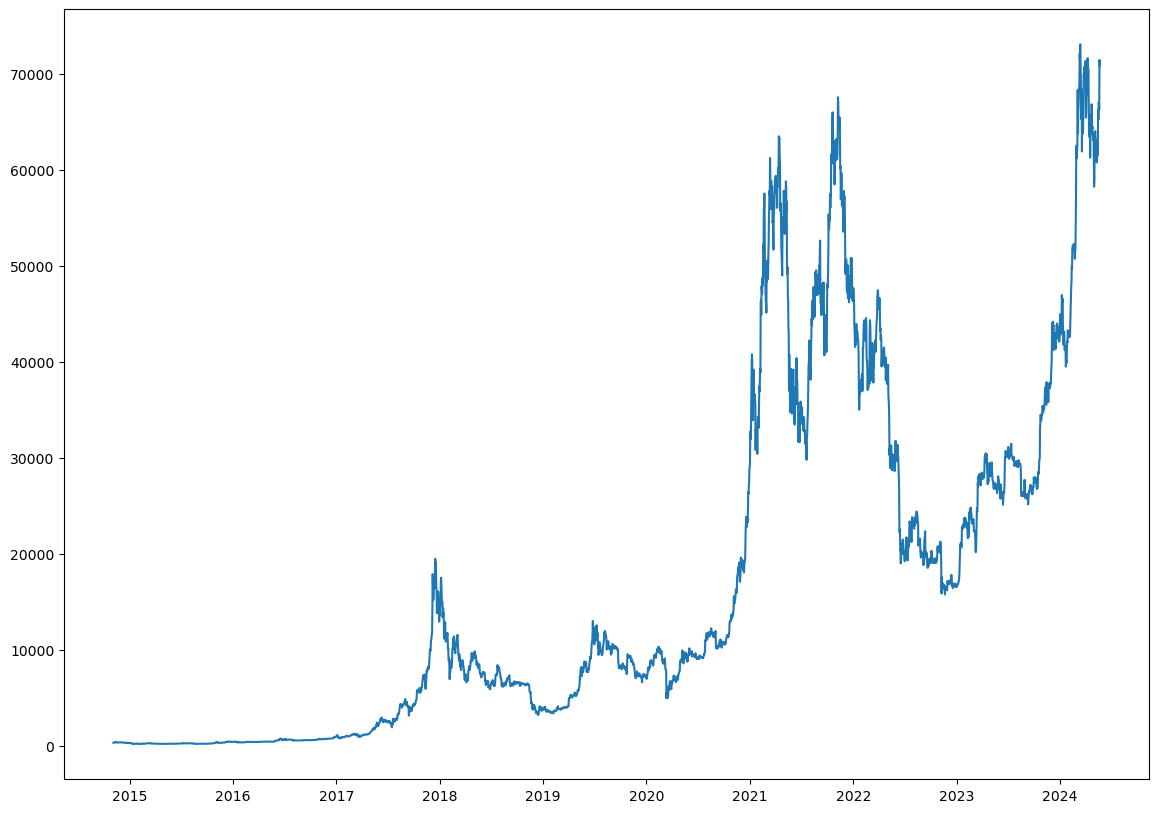

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ta
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error


# ایجاد DataFrame از داده‌های لیست
dates = pd.date_range(start='2014-09-17', periods=len(closeColumList), freq='D')
df = pd.DataFrame({'Close': closeColumList}, index=dates)

# استفاده از داده‌ها تا 365 روز قبل از پایان لیست
df_train = df[:-365]
df_test = df[-365:]

# محاسبه اندیکاتورهای پیشرفته برای داده‌های آموزشی
df_train['EMA_20'] = ta.trend.ema_indicator(df_train['Close'], window=20)
df_train['EMA_50'] = ta.trend.ema_indicator(df_train['Close'], window=50)
df_train['RSI'] = ta.momentum.rsi(df_train['Close'], window=14)
bb_indicator_train = ta.volatility.BollingerBands(df_train['Close'], window=20, window_dev=2)
df_train['BB_High'] = bb_indicator_train.bollinger_hband()
df_train['BB_Low'] = bb_indicator_train.bollinger_lband()
macd_indicator_train = ta.trend.MACD(df_train['Close'])
df_train['MACD'] = macd_indicator_train.macd()
df_train['MACD_Signal'] = macd_indicator_train.macd_signal()

# حذف سطرهایی که حاوی NaN هستند
df_train.dropna(inplace=True)

# آماده‌سازی داده‌ها برای مدل SVR
X_train = df_train[['EMA_20', 'EMA_50', 'RSI', 'BB_High', 'BB_Low', 'MACD', 'MACD_Signal']]
y_train = df_train['Close']

# استانداردسازی داده‌ها
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()

# ایجاد و آموزش مدل SVR
model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
model.fit(X_train_scaled, y_train_scaled)

# محاسبه اندیکاتورهای پیشرفته برای داده‌های تست بر اساس داده‌های `df_train` و `df_test` مشترک
df_combined = pd.concat([df_train, df_test])
df_combined['EMA_20'] = ta.trend.ema_indicator(df_combined['Close'], window=20)
df_combined['EMA_50'] = ta.trend.ema_indicator(df_combined['Close'], window=50)
df_combined['RSI'] = ta.momentum.rsi(df_combined['Close'], window=14)
bb_indicator_combined = ta.volatility.BollingerBands(df_combined['Close'], window=20, window_dev=2)
df_combined['BB_High'] = bb_indicator_combined.bollinger_hband()
df_combined['BB_Low'] = bb_indicator_combined.bollinger_lband()
macd_indicator_combined = ta.trend.MACD(df_combined['Close'])
df_combined['MACD'] = macd_indicator_combined.macd()
df_combined['MACD_Signal'] = macd_indicator_combined.macd_signal()

# استخراج مجدد `df_test` با اندیکاتورهای محاسبه‌شده جدید
df_test = df_combined[-365:]

# حذف سطرهایی که حاوی NaN هستند
df_test.dropna(inplace=True)

# شبیه‌سازی خرید و فروش برای 365 روز آخر
initial_investment = 10000  # مقدار اولیه پول (مثلاً 10,000 دلار)
cash = initial_investment
bitcoin = 0
predicted_prices = []

for i in range(len(df_train), len(df_combined)):
    current_price = df_combined['Close'].iloc[i]
    
    if i < len(df_combined) - 1:
        next_X = np.array([df_combined['EMA_20'].iloc[i], df_combined['EMA_50'].iloc[i], df_combined['RSI'].iloc[i], df_combined['BB_High'].iloc[i], df_combined['BB_Low'].iloc[i], df_combined['MACD'].iloc[i], df_combined['MACD_Signal'].iloc[i]]).reshape(1, -1)
        next_X_scaled = scaler_X.transform(next_X)
        next_y_scaled = model.predict(next_X_scaled)
        next_price = scaler_y.inverse_transform(next_y_scaled.reshape(-1, 1)).flatten()[0]
        predicted_prices.append(next_price)
        
        if next_price > current_price:  # سیگنال خرید
            if cash > 0:
                bitcoin += cash / current_price
                cash = 0
        elif next_price < current_price:  # سیگنال فروش
            if bitcoin > 0:
                cash += bitcoin * current_price
                bitcoin = 0

# محاسبه سود نهایی
final_cash = cash + bitcoin * df_combined['Close'].iloc[-1]
profit = final_cash - initial_investment

# رسم نمودار قیمت بیت‌کوین به همراه پیش‌بینی‌ها
plt.figure(figsize=(14, 10))

plt.plot(df_combined.index, df_combined['Close'], label='Actual Prices')
plt.plot(df_combined.index[-365:], predicted_prices, label='Predicted Prices')
plt.title('Bitcoin Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# محاسبه درصد اختلاف
actual_prices = df_combined['Close'].values[-365:]
mape = mean_absolute_percentage_error(actual_prices, predicted_prices) * 100

# نمایش نتایج
print(f'Initial Investment: {initial_investment}')
print(f'Final Cash: {final_cash:.2f}')
print(f'Profit: {profit:.2f}')
print(f'MAPE (Mean Absolute Percentage Error): {mape:.2f}%')


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ta
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error


# ایجاد DataFrame از داده‌های لیست
dates = pd.date_range(start='2014-09-17', periods=len(closeColumList), freq='D')
df = pd.DataFrame({'Close': closeColumList}, index=dates)

# استفاده از داده‌ها تا 365 روز قبل از پایان لیست
df_train = df[:-365]
df_test = df[-365:]

# محاسبه اندیکاتورهای پیشرفته برای داده‌های آموزشی
df_train['EMA_20'] = ta.trend.ema_indicator(df_train['Close'], window=20)
df_train['EMA_50'] = ta.trend.ema_indicator(df_train['Close'], window=50)
df_train['RSI'] = ta.momentum.rsi(df_train['Close'], window=14)
bb_indicator_train = ta.volatility.BollingerBands(df_train['Close'], window=20, window_dev=2)
df_train['BB_High'] = bb_indicator_train.bollinger_hband()
df_train['BB_Low'] = bb_indicator_train.bollinger_lband()
macd_indicator_train = ta.trend.MACD(df_train['Close'])
df_train['MACD'] = macd_indicator_train.macd()
df_train['MACD_Signal'] = macd_indicator_train.macd_signal()

# حذف سطرهایی که حاوی NaN هستند
df_train.dropna(inplace=True)

# آماده‌سازی داده‌ها برای مدل SVR
X_train = df_train[['EMA_20', 'EMA_50', 'RSI', 'BB_High', 'BB_Low', 'MACD', 'MACD_Signal']]
y_train = df_train['Close']

# استانداردسازی داده‌ها
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()

# ایجاد و آموزش مدل SVR
model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
model.fit(X_train_scaled, y_train_scaled)

# محاسبه اندیکاتورهای پیشرفته برای داده‌های تست
df_test['EMA_20'] = ta.trend.ema_indicator(df_test['Close'], window=20)
df_test['EMA_50'] = ta.trend.ema_indicator(df_test['Close'], window=50)
df_test['RSI'] = ta.momentum.rsi(df_test['Close'], window=14)
bb_indicator_test = ta.volatility.BollingerBands(df_test['Close'], window=20, window_dev=2)
df_test['BB_High'] = bb_indicator_test.bollinger_hband()
df_test['BB_Low'] = bb_indicator_test.bollinger_lband()
macd_indicator_test = ta.trend.MACD(df_test['Close'])
df_test['MACD'] = macd_indicator_test.macd()
df_test['MACD_Signal'] = macd_indicator_test.macd_signal()

# حذف سطرهایی که حاوی NaN هستند
df_test.dropna(inplace=True)

# شبیه‌سازی خرید و فروش برای 365 روز آخر
initial_investment = 10000  # مقدار اولیه پول (مثلاً 10,000 دلار)
cash = initial_investment
bitcoin = 0
predicted_prices = []

for i in range(len(df_train), len(df)):
    current_price = df['Close'].iloc[i]
    
    if i < len(df) - 1:
        next_X = np.array([df['EMA_20'].iloc[i], df['EMA_50'].iloc[i], df['RSI'].iloc[i], df['BB_High'].iloc[i], df['BB_Low'].iloc[i], df['MACD'].iloc[i], df['MACD_Signal'].iloc[i]]).reshape(1, -1)
        next_X_scaled = scaler_X.transform(next_X)
        next_y_scaled = model.predict(next_X_scaled)
        next_price = scaler_y.inverse_transform(next_y_scaled.reshape(-1, 1)).flatten()[0]
        predicted_prices.append(next_price)
        
        if next_price > current_price:  # سیگنال خرید
            if cash > 0:
                bitcoin += cash / current_price
                cash = 0
        elif next_price < current_price:  # سیگنال فروش
            if bitcoin > 0:
                cash += bitcoin * current_price
                bitcoin = 0

# محاسبه سود نهایی
final_cash = cash + bitcoin * df['Close'].iloc[-1]
profit = final_cash - initial_investment

# رسم نمودار قیمت بیت‌کوین به همراه پیش‌بینی‌ها
plt.figure(figsize=(14, 10))

plt.plot(df.index, df['Close'], label='Actual Prices')
plt.plot(df.index[-365:], predicted_prices, label='Predicted Prices')
plt.title('Bitcoin Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# محاسبه درصد اختلاف
actual_prices = df['Close'].values[-365:]
mape = mean_absolute_percentage_error(actual_prices, predicted_prices) * 100

# نمایش نتایج
print(f'Initial Investment: {initial_investment}')
print(f'Final Cash: {final_cash:.2f}')
print(f'Profit: {profit:.2f}')
print(f'MAPE (Mean Absolute Percentage Error): {mape:.2f}%')


C:\Users\HP\AppData\Local\Temp\ipykernel_6332\1555752288.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['EMA_20'] = ta.trend.ema_indicator(df_train['Close'], window=20)
C:\Users\HP\AppData\Local\Temp\ipykernel_6332\1555752288.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['EMA_50'] = ta.trend.ema_indicator(df_train['Close'], window=50)
C:\Users\HP\AppData\Local\Temp\ipykernel_6332\1555752288.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

KeyError: 'EMA_20'

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ta
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error


# ایجاد DataFrame از داده‌های لیست
dates = pd.date_range(start='2014-09-17', periods=len(closeColumList), freq='D')
df = pd.DataFrame({'Close': closeColumList}, index=dates)

# استفاده از داده‌ها تا 365 روز قبل از پایان لیست
df_train = df[:-365]
df_test = df[-365:]

# محاسبه اندیکاتورهای پیشرفته برای داده‌های آموزشی
df_train['EMA_20'] = ta.trend.ema_indicator(df_train['Close'], window=20)
df_train['EMA_50'] = ta.trend.ema_indicator(df_train['Close'], window=50)
df_train['RSI'] = ta.momentum.rsi(df_train['Close'], window=14)
bb_indicator_train = ta.volatility.BollingerBands(df_train['Close'], window=20, window_dev=2)
df_train['BB_High'] = bb_indicator_train.bollinger_hband()
df_train['BB_Low'] = bb_indicator_train.bollinger_lband()
macd_indicator_train = ta.trend.MACD(df_train['Close'])
df_train['MACD'] = macd_indicator_train.macd()
df_train['MACD_Signal'] = macd_indicator_train.macd_signal()

# حذف سطرهایی که حاوی NaN هستند
df_train.dropna(inplace=True)

# آماده‌سازی داده‌ها برای مدل SVR
X_train = df_train[['EMA_20', 'EMA_50', 'RSI', 'BB_High', 'BB_Low', 'MACD', 'MACD_Signal']]
y_train = df_train['Close']

# استانداردسازی داده‌ها
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()

# ایجاد و آموزش مدل SVR
model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
model.fit(X_train_scaled, y_train_scaled)

# محاسبه اندیکاتورهای پیشرفته برای داده‌های تست
df_test['EMA_20'] = ta.trend.ema_indicator(df_test['Close'], window=20)
df_test['EMA_50'] = ta.trend.ema_indicator(df_test['Close'], window=50)
df_test['RSI'] = ta.momentum.rsi(df_test['Close'], window=14)
bb_indicator_test = ta.volatility.BollingerBands(df_test['Close'], window=20, window_dev=2)
df_test['BB_High'] = bb_indicator_test.bollinger_hband()
df_test['BB_Low'] = bb_indicator_test.bollinger_lband()
macd_indicator_test = ta.trend.MACD(df_test['Close'])
df_test['MACD'] = macd_indicator_test.macd()
df_test['MACD_Signal'] = macd_indicator_test.macd_signal()

# حذف سطرهایی که حاوی NaN هستند
df_test.dropna(inplace=True)

# شبیه‌سازی خرید و فروش برای 365 روز آخر
initial_investment = 10000  # مقدار اولیه پول (مثلاً 10,000 دلار)
cash = initial_investment
bitcoin = 0
predicted_prices = []

for i in range(len(df_train), len(df)):
    current_price = df['Close'].iloc[i]
    
    if i < len(df) - 1:
        next_X = np.array([df['EMA_20'].iloc[i], df['EMA_50'].iloc[i], df['RSI'].iloc[i], df['BB_High'].iloc[i], df['BB_Low'].iloc[i], df['MACD'].iloc[i], df['MACD_Signal'].iloc[i]]).reshape(1, -1)
        next_X_scaled = scaler_X.transform(next_X)
        next_y_scaled = model.predict(next_X_scaled)
        next_price = scaler_y.inverse_transform(next_y_scaled.reshape(-1, 1)).flatten()[0]
        predicted_prices.append(next_price)
        
        if next_price > current_price:  # سیگنال خرید
            if cash > 0:
                bitcoin += cash / current_price
                cash = 0
        elif next_price < current_price:  # سیگنال فروش
            if bitcoin > 0:
                cash += bitcoin * current_price
                bitcoin = 0

# محاسبه سود نهایی
final_cash = cash + bitcoin * df['Close'].iloc[-1]
profit = final_cash - initial_investment

# رسم نمودار قیمت بیت‌کوین به همراه پیش‌بینی‌ها
plt.figure(figsize=(14, 10))

plt.plot(df.index, df['Close'], label='Actual Prices')
plt.plot(df.index[-365:], predicted_prices, label='Predicted Prices')
plt.title('Bitcoin Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# محاسبه درصد اختلاف
actual_prices = df['Close'].values[-365:]
mape = mean_absolute_percentage_error(actual_prices, predicted_prices) * 100

# نمایش نتایج
print(f'Initial Investment: {initial_investment}')
print(f'Final Cash: {final_cash:.2f}')
print(f'Profit: {profit:.2f}')
print(f'MAPE (Mean Absolute Percentage Error): {mape:.2f}%')


C:\Users\HP\AppData\Local\Temp\ipykernel_6332\1555752288.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['EMA_20'] = ta.trend.ema_indicator(df_train['Close'], window=20)
C:\Users\HP\AppData\Local\Temp\ipykernel_6332\1555752288.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['EMA_50'] = ta.trend.ema_indicator(df_train['Close'], window=50)
C:\Users\HP\AppData\Local\Temp\ipykernel_6332\1555752288.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

KeyError: 'EMA_20'

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ta
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error

# ایجاد DataFrame از داده‌های لیست
dates = pd.date_range(start='2014-09-17', periods=len(closeColumList), freq='D')
df = pd.DataFrame({'Close': closeColumList}, index=dates)

# استفاده از داده‌ها تا 365 روز قبل از پایان لیست
df_train = df[:-365]
df_test = df[-365:]

# محاسبه اندیکاتورهای پیشرفته برای داده‌های آموزشی
df_train['EMA_20'] = ta.trend.ema_indicator(df_train['Close'], window=20)
df_train['EMA_50'] = ta.trend.ema_indicator(df_train['Close'], window=50)
df_train['RSI'] = ta.momentum.rsi(df_train['Close'], window=14)
bb_indicator_train = ta.volatility.BollingerBands(df_train['Close'], window=20, window_dev=2)
df_train['BB_High'] = bb_indicator_train.bollinger_hband()
df_train['BB_Low'] = bb_indicator_train.bollinger_lband()
macd_indicator_train = ta.trend.MACD(df_train['Close'])
df_train['MACD'] = macd_indicator_train.macd()
df_train['MACD_Signal'] = macd_indicator_train.macd_signal()

# حذف سطرهایی که حاوی NaN هستند
df_train.dropna(inplace=True)

# آماده‌سازی داده‌ها برای مدل SVR
X_train = df_train[['EMA_20', 'EMA_50', 'RSI', 'BB_High', 'BB_Low', 'MACD', 'MACD_Signal']]
y_train = df_train['Close']

# استانداردسازی داده‌ها
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()

# ایجاد و آموزش مدل SVR
model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
model.fit(X_train_scaled, y_train_scaled)

# محاس

C:\Users\HP\AppData\Local\Temp\ipykernel_6332\1427577165.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['EMA_20'] = ta.trend.ema_indicator(df_train['Close'], window=20)
C:\Users\HP\AppData\Local\Temp\ipykernel_6332\1427577165.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['EMA_50'] = ta.trend.ema_indicator(df_train['Close'], window=50)
C:\Users\HP\AppData\Local\Temp\ipykernel_6332\1427577165.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

SVR(C=100, gamma=0.1)

C:\Users\HP\AppData\Local\Temp\ipykernel_6332\3724925355.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['EMA_20'] = ta.trend.ema_indicator(df_train['Close'], window=20)
C:\Users\HP\AppData\Local\Temp\ipykernel_6332\3724925355.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['EMA_50'] = ta.trend.ema_indicator(df_train['Close'], window=50)
C:\Users\HP\AppData\Local\Temp\ipykernel_6332\3724925355.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

ValueError: x and y must have same first dimension, but have shapes (365,) and (364,)

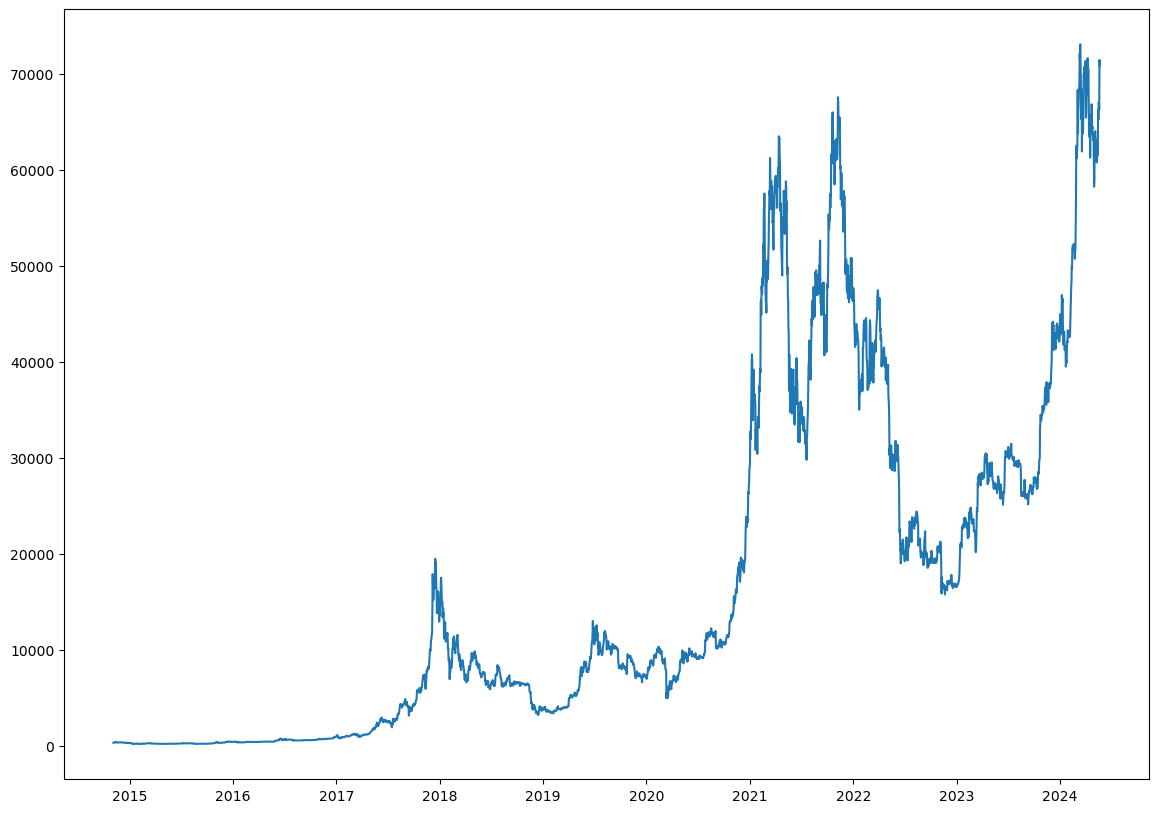

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ta
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error


# ایجاد DataFrame از داده‌های لیست
dates = pd.date_range(start='2014-09-17', periods=len(closeColumList), freq='D')
df = pd.DataFrame({'Close': closeColumList}, index=dates)

# استفاده از داده‌ها تا 365 روز قبل از پایان لیست
df_train = df[:-365]
df_test = df[-365:]

# محاسبه اندیکاتورهای پیشرفته برای داده‌های آموزشی
df_train['EMA_20'] = ta.trend.ema_indicator(df_train['Close'], window=20)
df_train['EMA_50'] = ta.trend.ema_indicator(df_train['Close'], window=50)
df_train['RSI'] = ta.momentum.rsi(df_train['Close'], window=14)
bb_indicator_train = ta.volatility.BollingerBands(df_train['Close'], window=20, window_dev=2)
df_train['BB_High'] = bb_indicator_train.bollinger_hband()
df_train['BB_Low'] = bb_indicator_train.bollinger_lband()
macd_indicator_train = ta.trend.MACD(df_train['Close'])
df_train['MACD'] = macd_indicator_train.macd()
df_train['MACD_Signal'] = macd_indicator_train.macd_signal()

# حذف سطرهایی که حاوی NaN هستند
df_train.dropna(inplace=True)

# آماده‌سازی داده‌ها برای مدل SVR
X_train = df_train[['EMA_20', 'EMA_50', 'RSI', 'BB_High', 'BB_Low', 'MACD', 'MACD_Signal']]
y_train = df_train['Close']

# استانداردسازی داده‌ها
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()

# ایجاد و آموزش مدل SVR
model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
model.fit(X_train_scaled, y_train_scaled)

# محاسبه اندیکاتورهای پیشرفته برای داده‌های تست
df_combined = pd.concat([df_train, df_test])
df_combined['EMA_20'] = ta.trend.ema_indicator(df_combined['Close'], window=20)
df_combined['EMA_50'] = ta.trend.ema_indicator(df_combined['Close'], window=50)
df_combined['RSI'] = ta.momentum.rsi(df_combined['Close'], window=14)
bb_indicator_combined = ta.volatility.BollingerBands(df_combined['Close'], window=20, window_dev=2)
df_combined['BB_High'] = bb_indicator_combined.bollinger_hband()
df_combined['BB_Low'] = bb_indicator_combined.bollinger_lband()
macd_indicator_combined = ta.trend.MACD(df_combined['Close'])
df_combined['MACD'] = macd_indicator_combined.macd()
df_combined['MACD_Signal'] = macd_indicator_combined.macd_signal()

# استخراج مجدد df_test با اندیکاتورهای محاسبه‌شده جدید
df_test = df_combined[-365:]

# حذف سطرهایی که حاوی NaN هستند
df_test.dropna(inplace=True)

# شبیه‌سازی خرید و فروش برای 365 روز آخر
initial_investment = 10000  # مقدار اولیه پول (مثلاً 10,000 دلار)
cash = initial_investment
bitcoin = 0
predicted_prices = []

for i in range(len(df_train), len(df_combined)):
    current_price = df_combined['Close'].iloc[i]
    
    if i < len(df_combined) - 1:
        next_X = np.array([df_combined['EMA_20'].iloc[i], df_combined['EMA_50'].iloc[i], df_combined['RSI'].iloc[i], df_combined['BB_High'].iloc[i], df_combined['BB_Low'].iloc[i], df_combined['MACD'].iloc[i], df_combined['MACD_Signal'].iloc[i]]).reshape(1, -1)
        next_X_scaled = scaler_X.transform(next_X)
        next_y_scaled = model.predict(next_X_scaled)
        next_price = scaler_y.inverse_transform(next_y_scaled.reshape(-1, 1)).flatten()[0]
        predicted_prices.append(next_price)
        
        if next_price > current_price:  # سیگنال خرید
            if cash > 0:
                bitcoin += cash / current_price
                cash = 0
        elif next_price < current_price:  # سیگنال فروش
            if bitcoin > 0:
                cash += bitcoin * current_price
                bitcoin = 0

# محاسبه سود نهایی
final_cash = cash + bitcoin * df_combined['Close'].iloc[-1]
profit = final_cash - initial_investment

# رسم نمودار قیمت بیت‌کوین به همراه پیش‌بینی‌ها
plt.figure(figsize=(14, 10))

plt.plot(df_combined.index, df_combined['Close'], label='Actual Prices')
plt.plot(df_combined.index[-365:], predicted_prices, label='Predicted Prices')
plt.title('Bitcoin Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# محاسبه درصد اختلاف
actual_prices = df_combined['Close'].values[-365:]
mape = mean_absolute_percentage_error(actual_prices, predicted_prices) * 100

# نمایش نتایج
print(f'Initial Investment: {initial_investment}')
print(f'Final Cash: {final_cash:.2f}')
print(f'Profit: {profit:.2f}')
print(f'MAPE (Mean Absolute Percentage Error): {mape:.2f}%')


C:\Users\HP\AppData\Local\Temp\ipykernel_6332\3724925355.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['EMA_20'] = ta.trend.ema_indicator(df_train['Close'], window=20)
C:\Users\HP\AppData\Local\Temp\ipykernel_6332\3724925355.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['EMA_50'] = ta.trend.ema_indicator(df_train['Close'], window=50)
C:\Users\HP\AppData\Local\Temp\ipykernel_6332\3724925355.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

ValueError: x and y must have same first dimension, but have shapes (365,) and (364,)

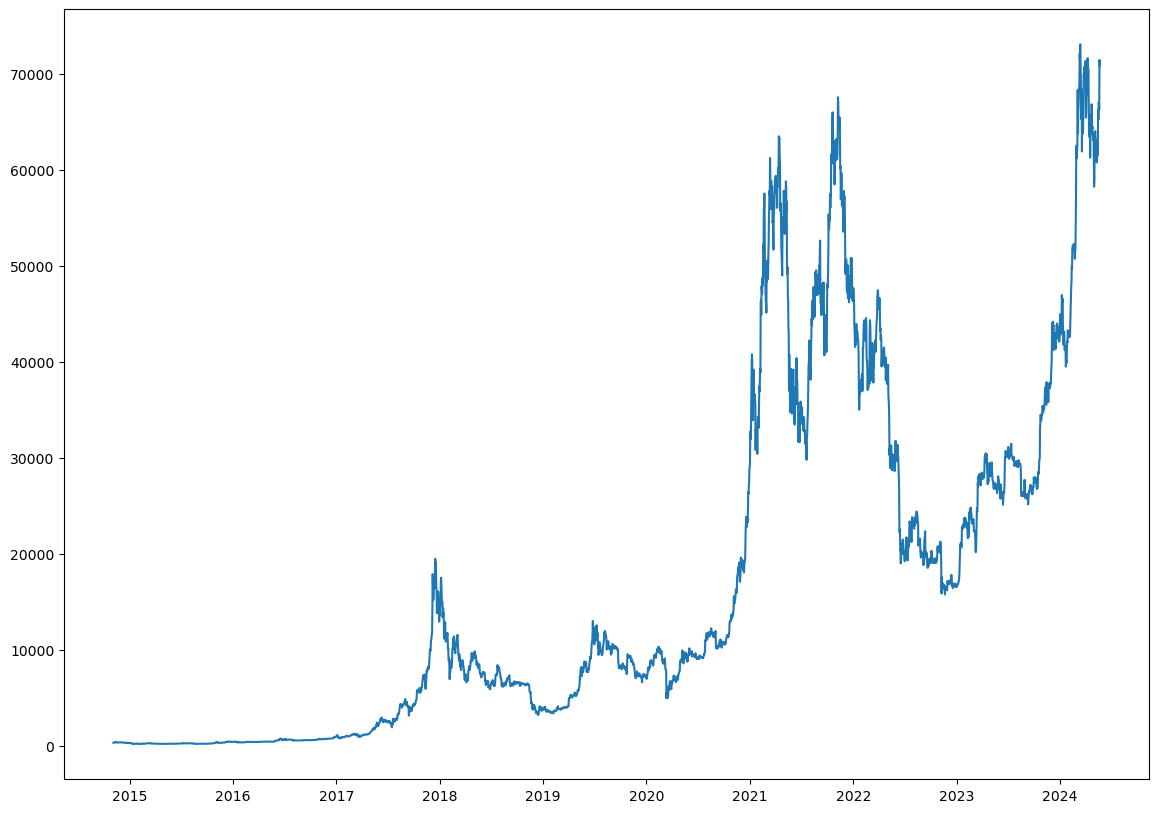

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ta
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error


# ایجاد DataFrame از داده‌های لیست
dates = pd.date_range(start='2014-09-17', periods=len(closeColumList), freq='D')
df = pd.DataFrame({'Close': closeColumList}, index=dates)

# استفاده از داده‌ها تا 365 روز قبل از پایان لیست
df_train = df[:-365]
df_test = df[-365:]

# محاسبه اندیکاتورهای پیشرفته برای داده‌های آموزشی
df_train['EMA_20'] = ta.trend.ema_indicator(df_train['Close'], window=20)
df_train['EMA_50'] = ta.trend.ema_indicator(df_train['Close'], window=50)
df_train['RSI'] = ta.momentum.rsi(df_train['Close'], window=14)
bb_indicator_train = ta.volatility.BollingerBands(df_train['Close'], window=20, window_dev=2)
df_train['BB_High'] = bb_indicator_train.bollinger_hband()
df_train['BB_Low'] = bb_indicator_train.bollinger_lband()
macd_indicator_train = ta.trend.MACD(df_train['Close'])
df_train['MACD'] = macd_indicator_train.macd()
df_train['MACD_Signal'] = macd_indicator_train.macd_signal()

# حذف سطرهایی که حاوی NaN هستند
df_train.dropna(inplace=True)

# آماده‌سازی داده‌ها برای مدل SVR
X_train = df_train[['EMA_20', 'EMA_50', 'RSI', 'BB_High', 'BB_Low', 'MACD', 'MACD_Signal']]
y_train = df_train['Close']

# استانداردسازی داده‌ها
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()

# ایجاد و آموزش مدل SVR
model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
model.fit(X_train_scaled, y_train_scaled)

# محاسبه اندیکاتورهای پیشرفته برای داده‌های تست
df_combined = pd.concat([df_train, df_test])
df_combined['EMA_20'] = ta.trend.ema_indicator(df_combined['Close'], window=20)
df_combined['EMA_50'] = ta.trend.ema_indicator(df_combined['Close'], window=50)
df_combined['RSI'] = ta.momentum.rsi(df_combined['Close'], window=14)
bb_indicator_combined = ta.volatility.BollingerBands(df_combined['Close'], window=20, window_dev=2)
df_combined['BB_High'] = bb_indicator_combined.bollinger_hband()
df_combined['BB_Low'] = bb_indicator_combined.bollinger_lband()
macd_indicator_combined = ta.trend.MACD(df_combined['Close'])
df_combined['MACD'] = macd_indicator_combined.macd()
df_combined['MACD_Signal'] = macd_indicator_combined.macd_signal()

# استخراج مجدد df_test با اندیکاتورهای محاسبه‌شده جدید
df_test = df_combined[-365:]

# حذف سطرهایی که حاوی NaN هستند
df_test.dropna(inplace=True)

# شبیه‌سازی خرید و فروش برای 365 روز آخر
initial_investment = 10000  # مقدار اولیه پول (مثلاً 10,000 دلار)
cash = initial_investment
bitcoin = 0
predicted_prices = []

for i in range(len(df_train), len(df_combined)):
    current_price = df_combined['Close'].iloc[i]
    
    if i < len(df_combined) - 1:
        next_X = np.array([df_combined['EMA_20'].iloc[i], df_combined['EMA_50'].iloc[i], df_combined['RSI'].iloc[i], df_combined['BB_High'].iloc[i], df_combined['BB_Low'].iloc[i], df_combined['MACD'].iloc[i], df_combined['MACD_Signal'].iloc[i]]).reshape(1, -1)
        next_X_scaled = scaler_X.transform(next_X)
        next_y_scaled = model.predict(next_X_scaled)
        next_price = scaler_y.inverse_transform(next_y_scaled.reshape(-1, 1)).flatten()[0]
        predicted_prices.append(next_price)
        
        if next_price > current_price:  # سیگنال خرید
            if cash > 0:
                bitcoin += cash / current_price
                cash = 0
        elif next_price < current_price:  # سیگنال فروش
            if bitcoin > 0:
                cash += bitcoin * current_price
                bitcoin = 0

# محاسبه سود نهایی
final_cash = cash + bitcoin * df_combined['Close'].iloc[-1]
profit = final_cash - initial_investment

# رسم نمودار قیمت بیت‌کوین به همراه پیش‌بینی‌ها
plt.figure(figsize=(14, 10))

plt.plot(df_combined.index, df_combined['Close'], label='Actual Prices')
plt.plot(df_combined.index[-365:], predicted_prices, label='Predicted Prices')
plt.title('Bitcoin Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# محاسبه درصد اختلاف
actual_prices = df_combined['Close'].values[-365:]
mape = mean_absolute_percentage_error(actual_prices, predicted_prices) * 100

# نمایش نتایج
print(f'Initial Investment: {initial_investment}')
print(f'Final Cash: {final_cash:.2f}')
print(f'Profit: {profit:.2f}')
print(f'MAPE (Mean Absolute Percentage Error): {mape:.2f}%')


C:\Users\HP\AppData\Local\Temp\ipykernel_6332\2066368664.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['EMA_20'] = ta.trend.ema_indicator(df_train['Close'], window=20)
C:\Users\HP\AppData\Local\Temp\ipykernel_6332\2066368664.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['EMA_50'] = ta.trend.ema_indicator(df_train['Close'], window=50)
C:\Users\HP\AppData\Local\Temp\ipykernel_6332\2066368664.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

ValueError: x and y must have same first dimension, but have shapes (365,) and (316,)

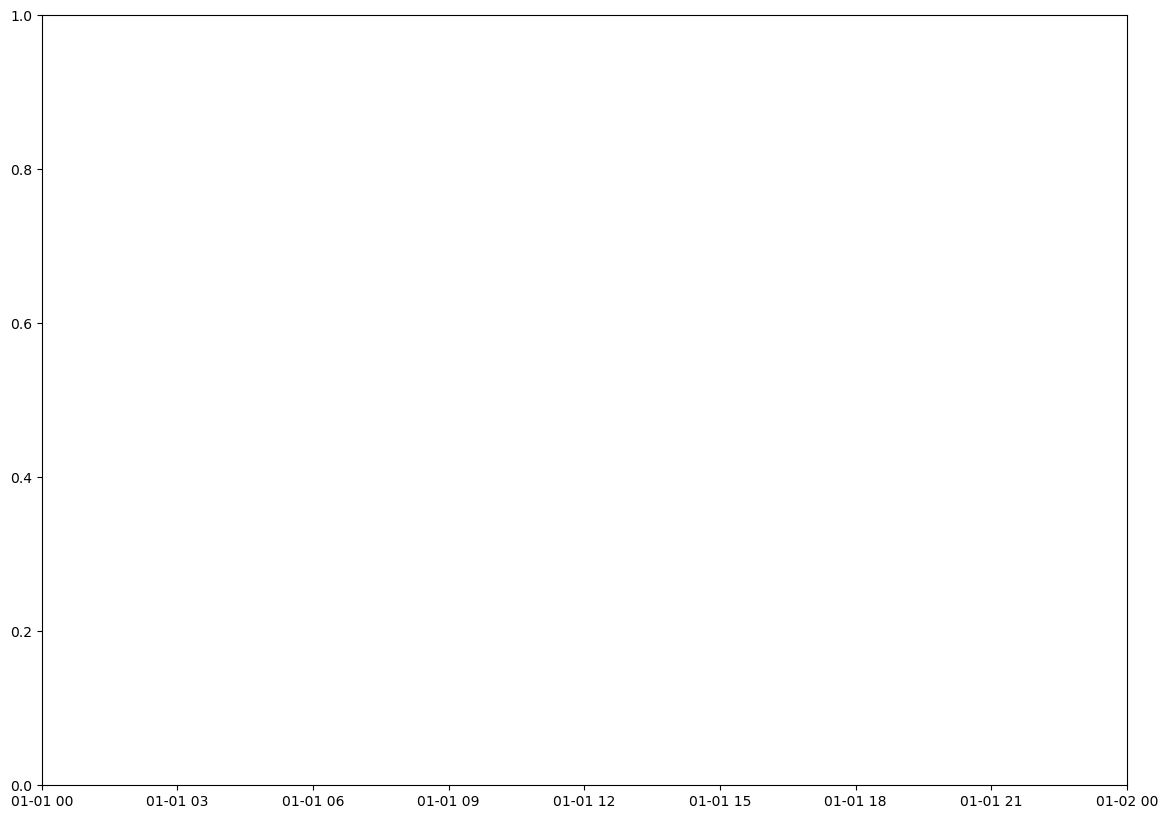

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ta
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error


# ایجاد DataFrame از داده‌های لیست
dates = pd.date_range(start='2014-09-17', periods=len(closeColumList), freq='D')
df = pd.DataFrame({'Close': closeColumList}, index=dates)

# استفاده از داده‌ها تا 365 روز قبل از پایان لیست
df_train = df[:-365]
df_test = df[-365:]

# محاسبه اندیکاتورهای پیشرفته برای داده‌های آموزشی
df_train['EMA_20'] = ta.trend.ema_indicator(df_train['Close'], window=20)
df_train['EMA_50'] = ta.trend.ema_indicator(df_train['Close'], window=50)
df_train['RSI'] = ta.momentum.rsi(df_train['Close'], window=14)
bb_indicator_train = ta.volatility.BollingerBands(df_train['Close'], window=20, window_dev=2)
df_train['BB_High'] = bb_indicator_train.bollinger_hband()
df_train['BB_Low'] = bb_indicator_train.bollinger_lband()
macd_indicator_train = ta.trend.MACD(df_train['Close'])
df_train['MACD'] = macd_indicator_train.macd()
df_train['MACD_Signal'] = macd_indicator_train.macd_signal()

# حذف سطرهایی که حاوی NaN هستند
df_train.dropna(inplace=True)

# آماده‌سازی داده‌ها برای مدل SVR
X_train = df_train[['EMA_20', 'EMA_50', 'RSI', 'BB_High', 'BB_Low', 'MACD', 'MACD_Signal']]
y_train = df_train['Close']

# استانداردسازی داده‌های آموزشی
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()

# ایجاد و آموزش مدل SVR
model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
model.fit(X_train_scaled, y_train_scaled)

# محاسبه اندیکاتورهای پیشرفته برای داده‌های تست
df_test['EMA_20'] = ta.trend.ema_indicator(df_test['Close'], window=20)
df_test['EMA_50'] = ta.trend.ema_indicator(df_test['Close'], window=50)
df_test['RSI'] = ta.momentum.rsi(df_test['Close'], window=14)
bb_indicator_test = ta.volatility.BollingerBands(df_test['Close'], window=20, window_dev=2)
df_test['BB_High'] = bb_indicator_test.bollinger_hband()
df_test['BB_Low'] = bb_indicator_test.bollinger_lband()
macd_indicator_test = ta.trend.MACD(df_test['Close'])
df_test['MACD'] = macd_indicator_test.macd()
df_test['MACD_Signal'] = macd_indicator_test.macd_signal()

# حذف سطرهایی که حاوی NaN هستند
df_test.dropna(inplace=True)

# آماده‌سازی داده‌های تست برای مدل SVR
X_test = df_test[['EMA_20', 'EMA_50', 'RSI', 'BB_High', 'BB_Low', 'MACD', 'MACD_Signal']]
y_test = df_test['Close']

# استانداردسازی داده‌های تست
X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# شبیه‌سازی خرید و فروش برای 365 روز آخر
initial_investment = 10000  # مقدار اولیه پول (مثلاً 10,000 دلار)
cash = initial_investment
bitcoin = 0
predicted_prices = []

for i in range(len(X_test)):
    current_price = y_test.values[i]
    
    next_X = X_test_scaled[i].reshape(1, -1)
    next_y_scaled = model.predict(next_X)
    next_price = scaler_y.inverse_transform(next_y_scaled.reshape(-1, 1)).flatten()[0]
    predicted_prices.append(next_price)
    
    if next_price > current_price:  # سیگنال خرید
        if cash > 0:
            bitcoin += cash / current_price
            cash = 0
    elif next_price < current_price:  # سیگنال فروش
        if bitcoin > 0:
            cash += bitcoin * current_price
            bitcoin = 0

# محاسبه سود نهایی
final_cash = cash + bitcoin * y_test.values[-1]
profit = final_cash - initial_investment

# رسم نمودار قیمت بیت‌کوین به همراه پیش‌بینی‌ها
plt.figure(figsize=(14, 10))

plt.plot(df.index[-365:], y_test.values, label='Actual Prices')
plt.plot(df.index[-365:], predicted_prices, label='Predicted Prices')
plt.title('Bitcoin Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# محاسبه درصد اختلاف
mape = mean_absolute_percentage_error(y_test.values, predicted_prices) * 100

# نمایش نتایج
print(f'Initial Investment: {initial_investment}')
print(f'Final Cash: {final_cash:.2f}')
print(f'Profit: {profit:.2f}')
print(f'MAPE (Mean Absolute Percentage Error): {mape:.2f}%')


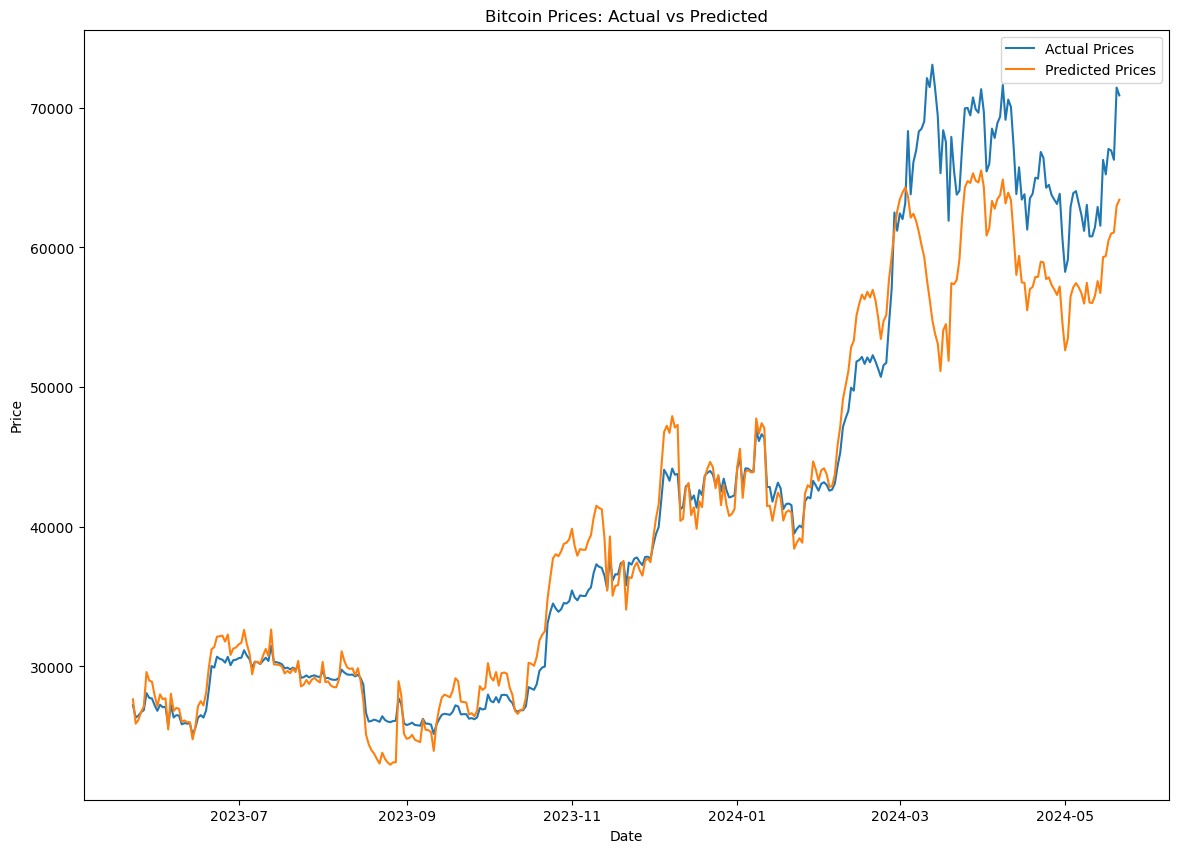

Initial Investment: 10000
Final Cash: 16197.22
Profit: 6197.22
MAPE (Mean Absolute Percentage Error): 5.26%


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ta
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error


# ایجاد DataFrame از داده‌های لیست
dates = pd.date_range(start='2014-09-17', periods=len(closeColumList), freq='D')
df = pd.DataFrame({'Close': closeColumList}, index=dates)

# محاسبه اندیکاتورهای پیشرفته برای کل داده‌ها
df['EMA_20'] = ta.trend.ema_indicator(df['Close'], window=20)
df['EMA_50'] = ta.trend.ema_indicator(df['Close'], window=50)
df['RSI'] = ta.momentum.rsi(df['Close'], window=14)
bb_indicator = ta.volatility.BollingerBands(df['Close'], window=20, window_dev=2)
df['BB_High'] = bb_indicator.bollinger_hband()
df['BB_Low'] = bb_indicator.bollinger_lband()
macd_indicator = ta.trend.MACD(df['Close'])
df['MACD'] = macd_indicator.macd()
df['MACD_Signal'] = macd_indicator.macd_signal()

# حذف سطرهایی که حاوی NaN هستند
df.dropna(inplace=True)

# استفاده از داده‌ها تا 365 روز قبل از پایان لیست برای آموزش و مابقی برای تست
df_train = df[:-365]
df_test = df[-365:]

# آماده‌سازی داده‌ها برای مدل SVR
X_train = df_train[['EMA_20', 'EMA_50', 'RSI', 'BB_High', 'BB_Low', 'MACD', 'MACD_Signal']]
y_train = df_train['Close']
X_test = df_test[['EMA_20', 'EMA_50', 'RSI', 'BB_High', 'BB_Low', 'MACD', 'MACD_Signal']]
y_test = df_test['Close']

# استانداردسازی داده‌ها
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# ایجاد و آموزش مدل SVR
model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
model.fit(X_train_scaled, y_train_scaled)

# پیش‌بینی قیمت‌های 365 روز آخر
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

# محاسبه درصد خطا (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100

# شبیه‌سازی خرید و فروش برای 365 روز آخر
initial_investment = 10000  # مقدار اولیه پول (مثلاً 10,000 دلار)
cash = initial_investment
bitcoin = 0

for i in range(len(y_test)):
    current_price = y_test.values[i]
    next_price = y_pred[i]

    if next_price > current_price:  # سیگنال خرید
        if cash > 0:
            bitcoin += cash / current_price
            cash = 0
    elif next_price < current_price:  # سیگنال فروش
        if bitcoin > 0:
            cash += bitcoin * current_price
            bitcoin = 0

# محاسبه سود نهایی
final_cash = cash + bitcoin * y_test.values[-1]
profit = final_cash - initial_investment

# رسم نمودار قیمت بیت‌کوین به همراه پیش‌بینی‌ها
plt.figure(figsize=(14, 10))
plt.plot(df.index[-365:], y_test.values, label='Actual Prices')
plt.plot(df.index[-365:], y_pred, label='Predicted Prices')
plt.title('Bitcoin Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# نمایش نتایج
print(f'Initial Investment: {initial_investment}')
print(f'Final Cash: {final_cash:.2f}')
print(f'Profit: {profit:.2f}')
print(f'MAPE (Mean Absolute Percentage Error): {mape:.2f}%')


In [21]:
pip install scikit-learn ta


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ta
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_percentage_error


# ایجاد DataFrame از داده‌های لیست
dates = pd.date_range(start='2014-09-17', periods=len(closeColumList), freq='D')
df = pd.DataFrame({'Close': closeColumList}, index=dates)

# محاسبه اندیکاتورهای پیشرفته برای کل داده‌ها
df['EMA_20'] = ta.trend.ema_indicator(df['Close'], window=20)
df['EMA_50'] = ta.trend.ema_indicator(df['Close'], window=50)
df['RSI'] = ta.momentum.rsi(df['Close'], window=14)
bb_indicator = ta.volatility.BollingerBands(df['Close'], window=20, window_dev=2)
df['BB_High'] = bb_indicator.bollinger_hband()
df['BB_Low'] = bb_indicator.bollinger_lband()
macd_indicator = ta.trend.MACD(df['Close'])
df['MACD'] = macd_indicator.macd()
df['MACD_Signal'] = macd_indicator.macd_signal()

# حذف سطرهایی که حاوی NaN هستند
df.dropna(inplace=True)

# استفاده از داده‌ها تا 365 روز قبل از پایان لیست برای آموزش و مابقی برای تست
df_train = df[:-365]
df_test = df[-365:]

# آماده‌سازی داده‌ها برای مدل SVR
X_train = df_train[['EMA_20', 'EMA_50', 'RSI', 'BB_High', 'BB_Low', 'MACD', 'MACD_Signal']]
y_train = df_train['Close']
X_test = df_test[['EMA_20', 'EMA_50', 'RSI', 'BB_High', 'BB_Low', 'MACD', 'MACD_Signal']]
y_test = df_test['Close']

# استانداردسازی داده‌ها
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# تنظیم هایپرپارامترها با استفاده از GridSearchCV
param_grid = {
    'C': [1, 10, 100, 1000],
    'gamma': [0.001, 0.01, 0.1, 1],
    'epsilon': [0.001, 0.01, 0.1, 1]
}

grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5, scoring='neg_mean_absolute_percentage_error')
grid_search.fit(X_train_scaled, y_train_scaled)

# بهترین مدل را انتخاب کنید
best_model = grid_search.best_estimator_

# پیش‌بینی قیمت‌های 365 روز آخر با بهترین مدل
y_pred_scaled = best_model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

# محاسبه درصد خطا (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100

# شبیه‌سازی خرید و فروش برای 365 روز آخر
initial_investment = 10000  # مقدار اولیه پول (مثلاً 10,000 دلار)
cash = initial_investment
bitcoin = 0

for i in range(len(y_test)):
    current_price = y_test.values[i]
    next_price = y_pred[i]

    if next_price > current_price:  # سیگنال خرید
        if cash > 0:
            bitcoin += cash / current_price
            cash = 0
    elif next_price < current_price:  # سیگنال فروش
        if bitcoin > 0:
            cash += bitcoin * current_price
            bitcoin = 0

# محاسبه سود نهایی
final_cash = cash + bitcoin * y_test.values[-1]
profit = final_cash - initial_investment

# رسم نمودار قیمت بیت‌کوین به همراه پیش‌بینی‌ها
plt.figure(figsize=(14, 10))
plt.plot(df.index[-365:], y_test.values, label='Actual Prices')
plt.plot(df.index[-365:], y_pred, label='Predicted Prices')
plt.title('Bitcoin Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# نمایش نتایج
print(f'Initial Investment: {initial_investment}')
print(f'Final Cash: {final_cash:.2f}')
print(f'Profit: {profit:.2f}')
print(f'MAPE (Mean Absolute Percentage Error): {mape:.2f}%')


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ta
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_percentage_error


# ایجاد DataFrame از داده‌های لیست
dates = pd.date_range(start='2014-09-17', periods=len(closeColumList), freq='D')
df = pd.DataFrame({'Close': closeColumList}, index=dates)

# محاسبه اندیکاتورهای پیشرفته برای کل داده‌ها
df['EMA_20'] = ta.trend.ema_indicator(df['Close'], window=20)
df['EMA_50'] = ta.trend.ema_indicator(df['Close'], window=50)
df['RSI'] = ta.momentum.rsi(df['Close'], window=14)
bb_indicator = ta.volatility.BollingerBands(df['Close'], window=20, window_dev=2)
df['BB_High'] = bb_indicator.bollinger_hband()
df['BB_Low'] = bb_indicator.bollinger_lband()
macd_indicator = ta.trend.MACD(df['Close'])
df['MACD'] = macd_indicator.macd()
df['MACD_Signal'] = macd_indicator.macd_signal()

# حذف سطرهایی که حاوی NaN هستند
df.dropna(inplace=True)

# استفاده از داده‌ها تا 365 روز قبل از پایان لیست برای آموزش و مابقی برای تست
df_train = df[:-365]
df_test = df[-365:]

# آماده‌سازی داده‌ها برای مدل SVR
X_train = df_train[['EMA_20', 'EMA_50', 'RSI', 'BB_High', 'BB_Low', 'MACD', 'MACD_Signal']]
y_train = df_train['Close']
X_test = df_test[['EMA_20', 'EMA_50', 'RSI', 'BB_High', 'BB_Low', 'MACD', 'MACD_Signal']]
y_test = df_test['Close']

# استانداردسازی داده‌ها
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# تنظیم هایپرپارامترها با استفاده از GridSearchCV
param_grid = {
    'C': [1, 10, 100, 1000],
    'gamma': [0.001, 0.01, 0.1, 1],
    'epsilon': [0.001, 0.01, 0.1, 1]
}

grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5, scoring='neg_mean_absolute_percentage_error')
grid_search.fit(X_train_scaled, y_train_scaled)

# بهترین مدل را انتخاب کنید
best_model = grid_search.best_estimator_

# پیش‌بینی قیمت‌های 365 روز آخر با بهترین مدل
y_pred_scaled = best_model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

# محاسبه درصد خطا (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100

# شبیه‌سازی خرید و فروش برای 365 روز آخر
initial_investment = 10000  # مقدار اولیه پول (مثلاً 10,000 دلار)
cash = initial_investment
bitcoin = 0

for i in range(len(y_test)):
    current_price = y_test.values[i]
    next_price = y_pred[i]

    if next_price > current_price:  # سیگنال خرید
        if cash > 0:
            bitcoin += cash / current_price
            cash = 0
    elif next_price < current_price:  # سیگنال فروش
        if bitcoin > 0:
            cash += bitcoin * current_price
            bitcoin = 0

# محاسبه سود نهایی
final_cash = cash + bitcoin * y_test.values[-1]
profit = final_cash - initial_investment

# رسم نمودار قیمت بیت‌کوین به همراه پیش‌بینی‌ها
plt.figure(figsize=(14, 10))
plt.plot(df.index[-365:], y_test.values, label='Actual Prices')
plt.plot(df.index[-365:], y_pred, label='Predicted Prices')
plt.title('Bitcoin Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# نمایش نتایج
print(f'Initial Investment: {initial_investment}')
print(f'Final Cash: {final_cash:.2f}')
print(f'Profit: {profit:.2f}')
print(f'MAPE (Mean Absolute Percentage Error): {mape:.2f}%')
